# Image Classification with MNIST Dataset using PyTorch

In this notebook, we will create and train a deep neural network for image classification using the MNIST dataset. We'll go through the following steps:

1. Download and prepare the MNIST dataset.
2. Implement a deep neural network with two hidden layers.
3. Train the model using cross-entropy loss and Adam optimizer.
4. Evaluate the model and plot training curves.

---

## 1. Download and Prepare the MNIST Dataset

First, we need to download and prepare the MNIST dataset using PyTorch's `torchvision` library. We'll apply some basic transformations and load the data using `DataLoader`.



In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 60000
Number of test samples: 10000


# 2. Implement the Deep Neural Network
 We'll create a simple neural network with two hidden layers using PyTorch's nn.Module. The network will have ReLU activations and an output layer with 10 neurons for classification.

In [7]:
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 128)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(128, 10)     # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()


# 3. Train the Model
We will train the model using cross-entropy loss and the Adam optimizer. During training, we'll keep track of the loss and accuracy.

In [8]:
import matplotlib.pyplot as plt

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Calculate running loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Average loss and accuracy for this epoch
        avg_loss = running_loss / len(train_loader)
        accuracy = (correct / total) * 100

        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return train_losses, train_accuracies

# Train the model
train_losses, train_accuracies = train_model(model, train_loader, criterion, optimizer)


Epoch [1/5], Loss: 0.3574, Accuracy: 89.18%
Epoch [2/5], Loss: 0.1645, Accuracy: 95.10%
Epoch [3/5], Loss: 0.1231, Accuracy: 96.19%
Epoch [4/5], Loss: 0.1006, Accuracy: 96.81%
Epoch [5/5], Loss: 0.0839, Accuracy: 97.27%


# 4. Evaluate the Model
Finally, we will evaluate the model on the test dataset and plot the training curves.

Test Accuracy: 96.81%


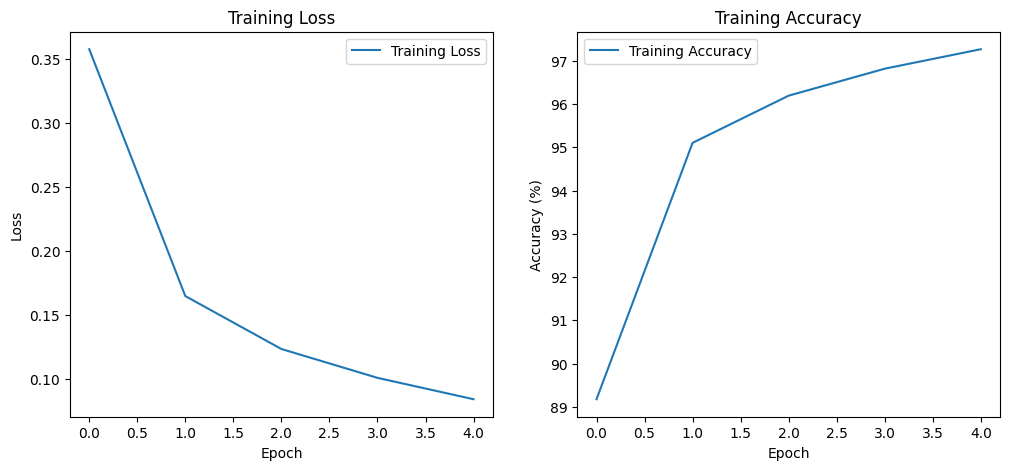

In [9]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    return accuracy

# Evaluate the model
test_accuracy = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.show()
